# Mixture of Experts Network for MNIST

In [106]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import concatenate, Lambda, Reshape
from keras.optimizers import Adam
import keras.backend as K
from keras.datasets import mnist

import pydot
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [178]:
batch_size = 64
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [179]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train0 = y_train[:]
y_test0 = y_test[:]
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [123]:
input1 = Input(shape=input_shape)

In [216]:
def baseModel(input1, num_classes):
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(input1)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)
    return x

In [217]:
x1 = baseModel(input1, num_classes)
x1Model = Model(input1, x1)

In [218]:
x1Model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [219]:
x1Model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2245 - acc: 0.9314 - val_loss: 0.0462 - val_acc: 0.9864
Epoch 2/3
60000/60000 [==============================] - 59s 991us/step - loss: 0.0885 - acc: 0.9737 - val_loss: 0.0366 - val_acc: 0.9868
Epoch 3/3
60000/60000 [==============================] - 59s 984us/step - loss: 0.0667 - acc: 0.9800 - val_loss: 0.0349 - val_acc: 0.9885


In [220]:
x1Score = x1Model.evaluate(x_test, y_test)
print(x1Score)

10000/10000 [==============================] - 4s 400us/step
[0.034910372883686792, 0.98850000000000005]


In [207]:
zeroToFourTr = [i for i in range(len(y_train0)) if y_train0[i] in [0,1,2,3,4]]
fiveToNineTr = [i for i in range(len(y_train0)) if y_train0[i] in [5,6,7,8,9]]
zeroToFourTe = [i for i in range(len(y_test0)) if y_test0[i] in [0,1,2,3,4]]
fiveToNineTe = [i for i in range(len(y_test0)) if y_test0[i] in [5,6,7,8,9]]

In [234]:
x_train00 = x_train[zeroToFourTr]
x_test00 = x_test[zeroToFourTe]
y_train00 = y_train[zeroToFourTr]
y_test00 = y_test[zeroToFourTe]

In [ ]:
x_train00.shape, y_train00, x_test00.shape, y_test00

In [235]:
x00 = baseModel(input1, num_classes)
x00Model = Model(input1, x00)

In [236]:
x00Model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [237]:
x00Model.fit(x_train00, y_train00,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test00, y_test00))

Train on 30596 samples, validate on 5139 samples
Epoch 1/3
30596/30596 [==============================] - 33s 1ms/step - loss: 0.1080 - acc: 0.9658 - val_loss: 0.0119 - val_acc: 0.9963
Epoch 2/3
30596/30596 [==============================] - 32s 1ms/step - loss: 0.0324 - acc: 0.9900 - val_loss: 0.0101 - val_acc: 0.9965
Epoch 3/3
30596/30596 [==============================] - 31s 1ms/step - loss: 0.0247 - acc: 0.9926 - val_loss: 0.0065 - val_acc: 0.9984


In [240]:
x00Score = x00Model.evaluate(x_test00, y_test00)
print(x00Score)

5139/5139 [==============================] - 2s 443us/step
[0.0064898463812420003, 0.99844327690212109]


In [241]:
x_train11 = x_train[fiveToNineTr]
x_test11 = x_test[fiveToNineTe]
y_train11 = y_train[fiveToNineTr]
y_test11 = y_test[fiveToNineTe]

In [242]:
x_train11.shape, y_train11.shape, x_test11.shape, y_test11.shape

((29404, 28, 28, 1), (29404, 10), (4861, 28, 28, 1), (4861, 10))

In [243]:
x11 = baseModel(input1, 10)
x11Model = Model(input1, x11)

In [244]:
x11Model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [246]:
x11Model.fit(x_train11, y_train11,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test11, y_test11))

Train on 29404 samples, validate on 4861 samples
Epoch 1/3
29404/29404 [==============================] - 32s 1ms/step - loss: 0.1666 - acc: 0.9455 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 2/3
29404/29404 [==============================] - 30s 1ms/step - loss: 0.0512 - acc: 0.9835 - val_loss: 0.0347 - val_acc: 0.9889
Epoch 3/3
29404/29404 [==============================] - 29s 999us/step - loss: 0.0361 - acc: 0.9889 - val_loss: 0.0206 - val_acc: 0.9930


In [247]:
x11Score = x11Model.evaluate(x_test11, y_test11)
print(x11Score)

4861/4861 [==============================] - 2s 432us/step
[0.020630182366605715, 0.99300555441267224]


In [185]:
y_train01 = np.array([0 if i in [0,1,2,3,4] else 1 for i in y_train0])
y_test01 = np.array([0 if i in [0,1,2,3,4] else 1 for i in y_test0])
y_train01 = keras.utils.to_categorical(y_train01, 2)
y_test01 = keras.utils.to_categorical(y_test01, 2)

In [188]:
g0 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input1)
g0 = Conv2D(64, (3, 3), activation='relu')(g0)
g0 = MaxPooling2D(pool_size=(2, 2))(g0)
g0 = Dropout(0.25)(g0)
g0 = Flatten()(g0)
g0 = Dense(128, activation='relu')(g0)
g0 = Dropout(0.5)(g0)
g0 = Dense(2, activation='softmax')(g0)

In [249]:
g0 = baseModel(input1, 2)
g0Model = Model(input1, g0)

In [250]:
g0Model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [251]:
g0Model.fit(x_train, y_train01,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test01))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1008 - acc: 0.9617 - val_loss: 0.0419 - val_acc: 0.9848
Epoch 2/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0409 - acc: 0.9861 - val_loss: 0.0318 - val_acc: 0.9887
Epoch 3/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0309 - acc: 0.9895 - val_loss: 0.0275 - val_acc: 0.9920


In [252]:
g0Score = g0Model.evaluate(x_test, y_test01)
print(g0Score)

10000/10000 [==============================] - 4s 437us/step
[0.027455827408827464, 0.99199999999999999]


In [254]:
g0.shape

TensorShape([Dimension(None), Dimension(2)])

In [264]:
def subGate(input1, num_classes):
    g01 = Flatten()(input1)
    g01 = Dense(128, activation="relu")(g01)
    g01 = Dense(num_classes*2, activation="softmax")(g01)
    g01 = Reshape((num_classes, 2))(g01)
    return g01

In [266]:
g00 = subGate(input1, num_classes)
g11 = subGate(input1, num_classes)

In [261]:
g0Switch = Lambda(lambda gx: K.switch(gx[2][:,0] > gx[2][:,1], 
                                      gx[0], 
                                      gx[1]), 
                output_shape=(num_classes,))([x00, x11, g0, x1])

In [268]:
def subGateLambda(x0, x1, g01):
    output = Lambda(lambda gx: (gx[0]*gx[2][:,:,0]) + (gx[1]*gx[2][:,:,1]), output_shape=(num_classes,))([x0, x1, g01])
    return output

In [270]:
output = Lambda(lambda gx: K.switch(gx[2][:,0] > gx[2][:,1], 
                                    subGateLambda(gx[0],gx[3],gx[4]), 
                                    subGateLambda(gx[1],gx[3],gx[5])), 
                output_shape=(num_classes,))([x00, x11, g0, x1, g00, g11])

In [260]:
for l in x1Model.layers:
    l.trainable = False
for l in x00Model.layers:
    l.trainable = False
for l in x11Model.layers:
    l.trainable = False
for l in g0Model.layers:
    l.trainable = False

In [26]:
output = Lambda(lambda gx: (gx[0]*gx[2][:,:,0]) + (gx[1]*gx[2][:,:,1]), output_shape=(num_classes,))([x1, x2, g0])

In [89]:
output = Lambda(lambda gx: K.switch(gx[2][:,:,0] > 0.4, 
                                    gx[0]*gx[2][:,:,0], 
                                    gx[0]*0) + K.switch(gx[2][:,:,1] > 0.4, 
                                                        gx[1]*gx[2][:,:,1], 
                                                        gx[1]*0), 
                output_shape=(num_classes,))([x1, x2, g0])

In [271]:
model = Model(input1, output)

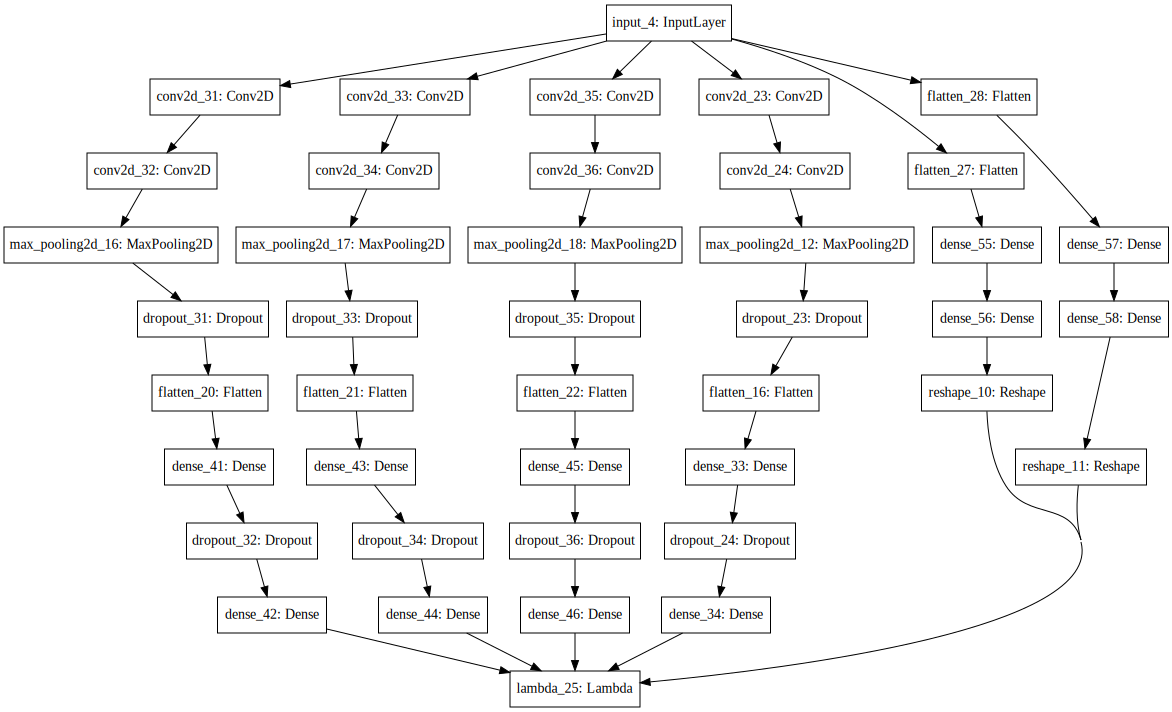

In [272]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [273]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [274]:
for l in model.layers:
    print(l, l.trainable)

<keras.engine.topology.InputLayer object at 0x7fa66acdf828> False
<keras.layers.convolutional.Conv2D object at 0x7fa66c93fa90> False
<keras.layers.convolutional.Conv2D object at 0x7fa66c0e4160> False
<keras.layers.convolutional.Conv2D object at 0x7fa66baad860> False
<keras.layers.convolutional.Conv2D object at 0x7fa666eb97b8> False
<keras.layers.convolutional.Conv2D object at 0x7fa66c9b2f28> False
<keras.layers.convolutional.Conv2D object at 0x7fa66c0e4eb8> False
<keras.layers.convolutional.Conv2D object at 0x7fa66bb17518> False
<keras.layers.convolutional.Conv2D object at 0x7fa666eb9908> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa66c93fe10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa66c17d9e8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa66baaddd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa666eb9a58> False
<keras.layers.core.Dropout object at 0x7fa66c8e77f0> False
<keras.layers.core.Dropout object at 0x7fa66c1b7f28> False
<keras.layer

In [275]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0361 - acc: 0.9889 - val_loss: 0.0307 - val_acc: 0.9901
Epoch 2/3
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0339 - acc: 0.9901 - val_loss: 0.0319 - val_acc: 0.9895
Epoch 3/3
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0297 - acc: 0.9913 - val_loss: 0.0295 - val_acc: 0.9908


In [276]:
score = model.evaluate(x_test, y_test)
print(score)

10000/10000 [==============================] - 9s 886us/step
[0.029530485406908339, 0.99080000000000001]
